In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [3]:
# Memuat dataset

url = 'https://raw.githubusercontent.com/A-Feed/Data-Cleaning/main/Dataset/data_label_optimal.csv'
data = pd.read_csv(url)

In [4]:
# Encoding Type Ikan dan Optimal

label_encoder_type = LabelEncoder()
data['type'] = label_encoder_type.fit_transform(data['type'])

label_encoder_optimal = LabelEncoder()
data['label'] = label_encoder_optimal.fit_transform(data['label'])

In [5]:
# Split Features dan Target

X = data[['ph', 'temp', 'type']]
Y = data['label']

In [6]:
# Split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# Scale features

scaler_feature = StandardScaler()
X_train = scaler_feature.fit_transform(X_train)
X_test = scaler_feature.fit_transform(X_test)

In [8]:
#Build model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
181/181 [==============================] - 2s 4ms/step - loss: 0.6272 - accuracy: 0.7078 - val_loss: 0.5561 - val_accuracy: 0.7497
Epoch 2/30
181/181 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7628 - val_loss: 0.4868 - val_accuracy: 0.7497
Epoch 3/30
181/181 [==============================] - 1s 3ms/step - loss: 0.4888 - accuracy: 0.7628 - val_loss: 0.4400 - val_accuracy: 0.7497
Epoch 4/30
181/181 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7628 - val_loss: 0.4118 - val_accuracy: 0.7497
Epoch 5/30
181/181 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.7628 - val_loss: 0.3919 - val_accuracy: 0.7497
Epoch 6/30
181/181 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7628 - val_loss: 0.3734 - val_accuracy: 0.7497
Epoch 7/30
181/181 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7628 - val_loss: 0.3628 - val_accuracy: 0.7497
Epoch 

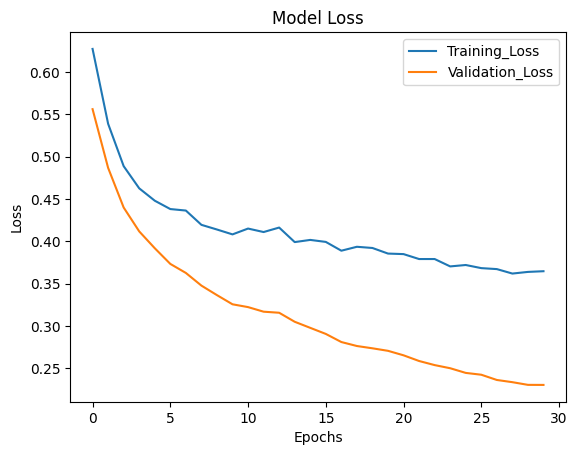

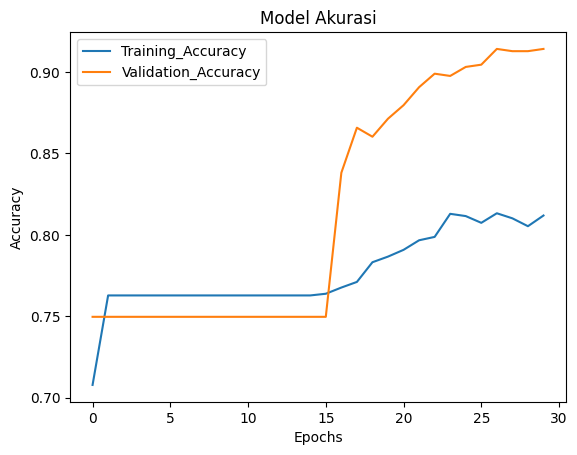

In [11]:
# Grafik Loss

plt.plot(history.history['loss'], label='Training_Loss')
plt.plot(history.history['val_loss'], label='Validation_Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Grafik Akurasi
plt.plot(history.history['accuracy'], label='Training_Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_Accuracy')
plt.title('Model Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluasi Model

loss, accuracy = model.evaluate(X_test, Y_test)
print(f'test accuracy : {accuracy*100:.2f}%')

29/29 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8982
test accuracy : 89.82%


In [13]:
# Menyimpan Model

model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
